# Exploratory Data Analysis (EDA) on Heart Disease Dataset
## Objective
The goal of this analysis is to explore patterns and relationships in the dataset to understand key factors contributing to heart disease.

### Steps Covered:
- **Univariate Analysis:** Individual feature distributions
- **Multivariate Analysis:** Relationships between features
- **Key Insights & Conclusions**

## 🔍 Key Insight: Target Variable Distribution
- The dataset is balanced, meaning both classes (presence or absence of heart disease) are well-represented.
- A balanced dataset ensures that the model does not favor one class over the other.

## 🔍 Key Insight: Age Distribution
- Most patients fall between **40-70 years old**, indicating that heart disease is more common in middle-aged and elderly individuals.
- Very few patients are younger than **40**, suggesting that younger people are less affected by heart disease.

## Relationship Between Chest Pain and Exercise-Induced Angina
- The heatmap shows that patients with typical angina tend to experience more exercise-induced angina.
- This suggests a possible correlation between chest pain type and stress-related heart conditions.

## Pair Plot Analysis
- The distribution of `Max_heart_rate` and `age` varies across genders.
- Certain features like `cholesterol` and `resting_blood_pressure` seem to have different patterns for males and females.

## 🔍 Key Insight: Pair Plot Analysis
- Certain variables, like **cholesterol and resting blood pressure**, have distinct distributions between **males and females**.
- The distribution of **max heart rate** shows noticeable differences in patients with and without heart disease.

# Conclusion
- Age, chest pain type, and exercise-induced angina show strong relationships with heart disease.
- Some features like `Max_heart_rate` differ significantly across genders.
- Further analysis, such as feature importance and model building, can help validate these findings.

## 🏁 Final Conclusion
- **Key Risk Factors for Heart Disease:** Age, Cholesterol, Chest Pain Type, Exercise-Induced Angina.
- **Men are more affected** than women in the dataset.
- **High cholesterol & chest pain symptoms** are key indicators of heart disease.
- **Older individuals (>50 years)** show higher risk based on declining max heart rate & increasing cholesterol.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df=pd.read_csv("dataset.csv")

In [2]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


target
1    526
0    499
Name: count, dtype: int64


<Axes: xlabel='target'>

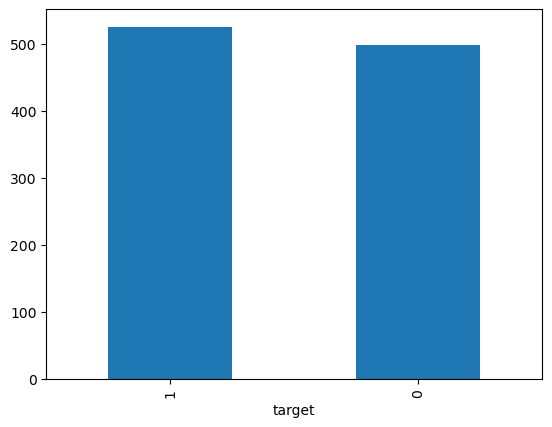

In [3]:
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'gender distribution')

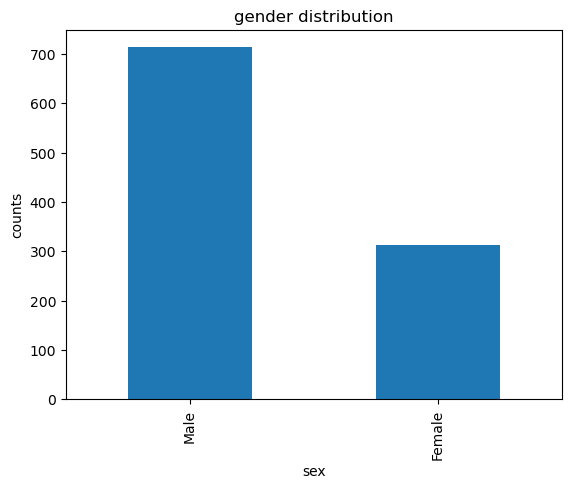

In [4]:
df['sex'].value_counts().plot(kind='bar')
plt.ylabel("counts")
plt.title("gender distribution")

## 🔍 Key Insight: Gender Distribution
- **Males** have a significantly higher presence in the dataset compared to **females**.
- This suggests that men may have a higher risk of developing heart disease compared to women.

<Axes: xlabel='fasting_blood_sugar'>

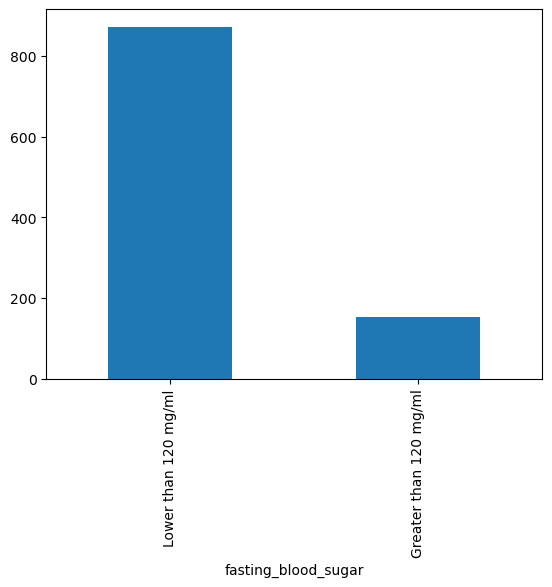

In [5]:
df['fasting_blood_sugar'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

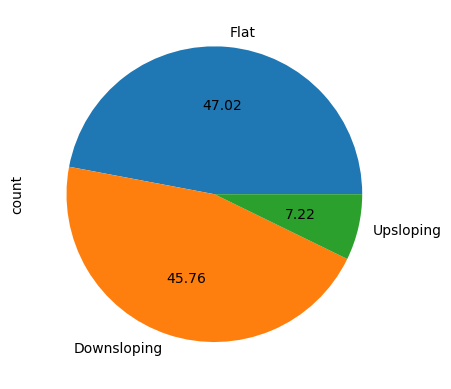

In [6]:
df['slope'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='exercise_induced_angina'>

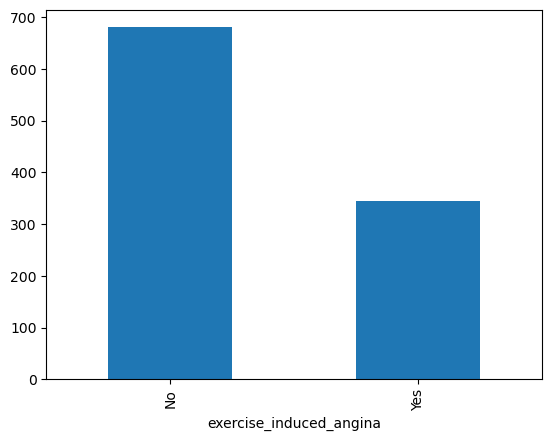

In [7]:
df['exercise_induced_angina'].value_counts().plot(kind='bar')

# 📈 Creating a histogram to visualize the distribution of numerical variables

Text(0.5, 1.0, 'Age distribution')

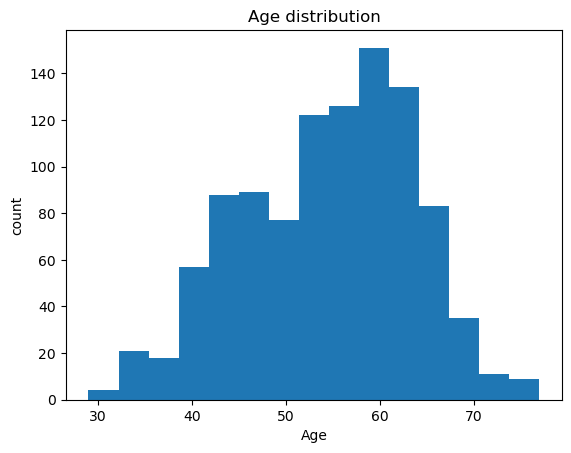

In [8]:
plt.hist(df['age'],bins=15)
plt.xlabel("Age")
plt.ylabel("count")
plt.title("Age distribution")

## 🔍 Key Insight: Age Distribution
- Most patients fall between **40-70 years old**, indicating that heart disease is more common in middle-aged and elderly individuals.
- Very few patients are younger than **40**, suggesting that younger people are less affected by heart disease.

# 📊 Plotting the distribution of numerical variables to analyze their spread

/var/folders/z2/qrqv0t8x7ynfp48p75lzm11c0000gn/T/ipykernel_26992/3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

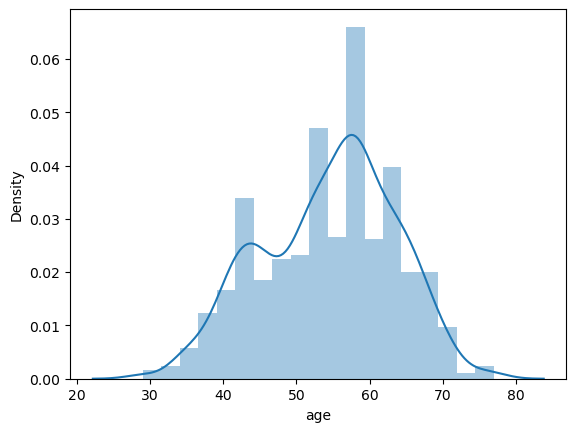

In [9]:
sns.distplot(df['age'])

<Axes: xlabel='vessels_colored_by_flourosopy'>

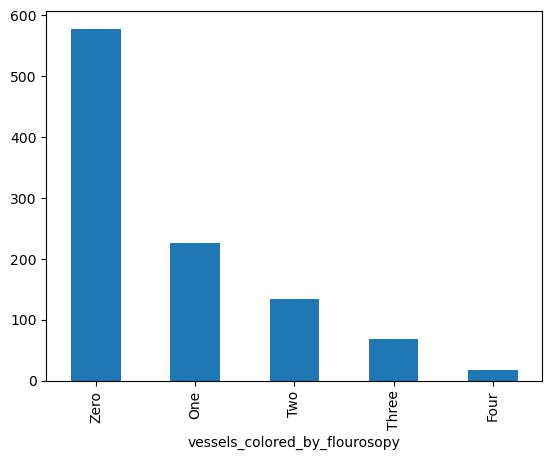

In [10]:
df['vessels_colored_by_flourosopy'].value_counts().plot(kind='bar')

# 📦 Using a boxplot to detect outliers and analyze variable distributions

<Axes: >

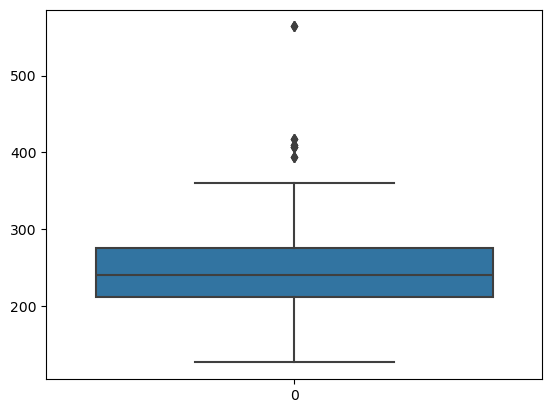

In [11]:
sns.boxplot(df['cholestoral'])

# 📊 Generating summary statistics to understand data distribution

In [12]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [13]:
print(df['age'].min())
print(df['age'].max())
print(df['cholestoral'].max())

29
77
564


In [14]:
df['age'].skew()

-0.24886590174584555

<Axes: xlabel='rest_ecg'>

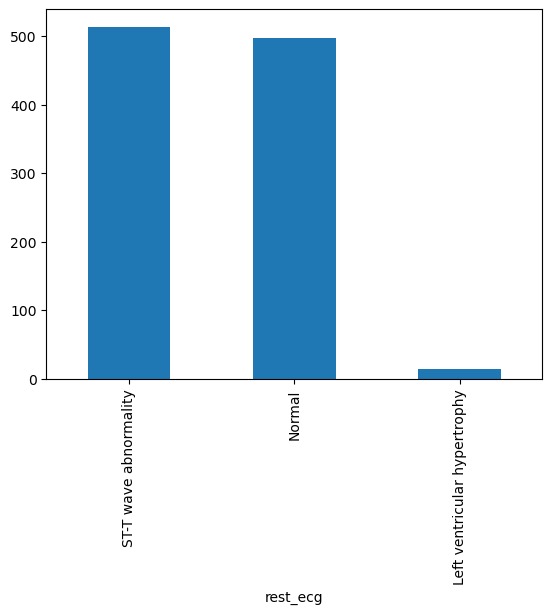

In [15]:
df['rest_ecg'].value_counts().plot(kind='bar')

# Multivariate Analysis

In [16]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


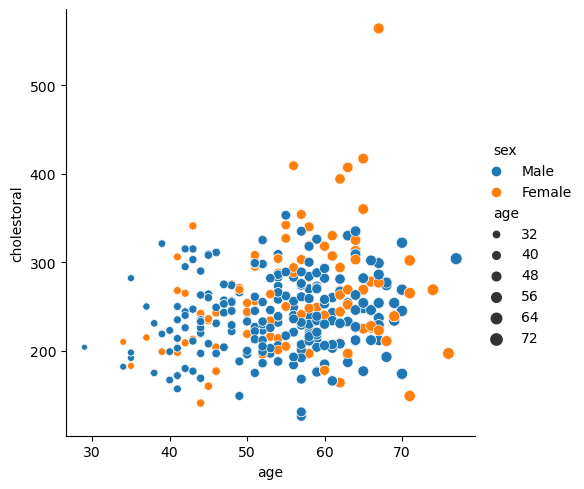

In [17]:
sns.relplot(data=df,x='age',y='cholestoral',kind='scatter',hue='sex',size='age')

# 📌 Visualizing categorical variable distributions using bar plots

<Axes: xlabel='fasting_blood_sugar', ylabel='age'>

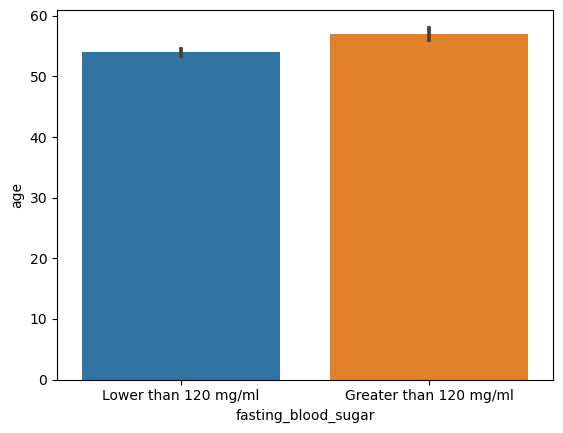

In [18]:
sns.barplot(x = df['fasting_blood_sugar'],y = df['age'])

# 📌 Visualizing categorical variable distributions using bar plots

<Axes: xlabel='chest_pain_type', ylabel='age'>

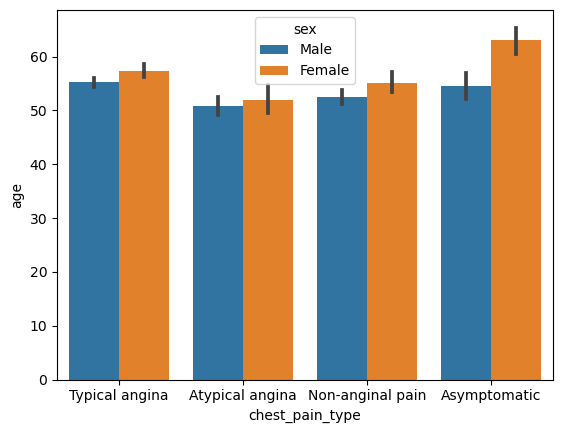

In [19]:
sns.barplot(x = df['chest_pain_type'],y = df['age'],hue=df['sex'])

# 📌 Visualizing categorical variable distributions using bar plots

<Axes: xlabel='thalassemia', ylabel='age'>

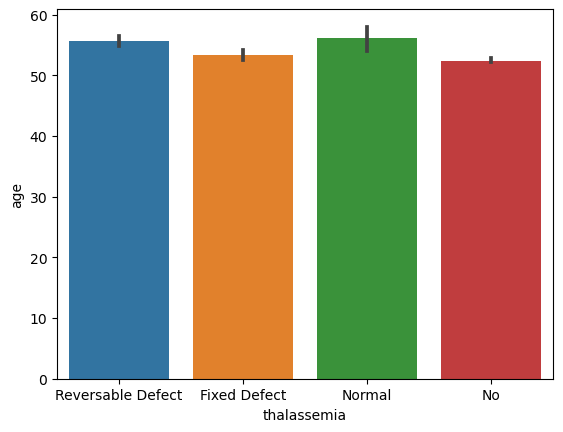

In [20]:
sns.barplot(x=df['thalassemia'],y=df['age'])

# 📦 Using a boxplot to detect outliers and analyze variable distributions

<Axes: xlabel='sex', ylabel='age'>

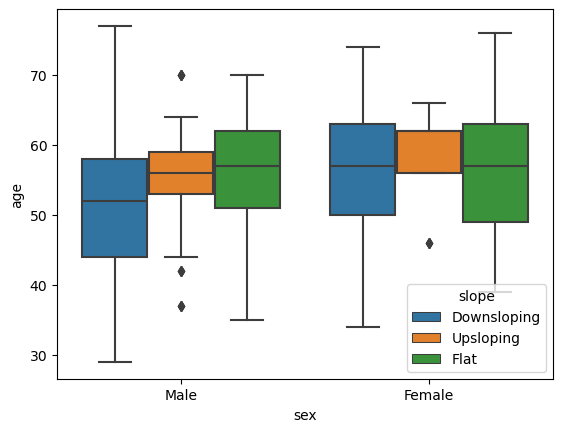

In [21]:
sns.boxplot(x=df['sex'],y=df['age'],hue=df['slope'])

# 🖼️ Displaying the final plot to visualize insights

/var/folders/z2/qrqv0t8x7ynfp48p75lzm11c0000gn/T/ipykernel_26992/3240475173.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['exercise_induced_angina']=='No']['age'],shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/z2/qrqv0t8x7ynfp48p75lzm11c0000gn/T/ipykernel_26992/3240475173.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['exercise_induced_angina']=='Yes']['age'],shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is d

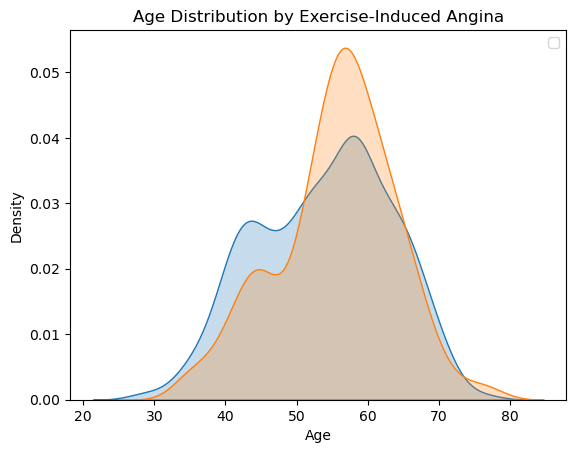

In [22]:
sns.kdeplot(df[df['exercise_induced_angina']=='No']['age'],shade=True)
sns.kdeplot(df[df['exercise_induced_angina']=='Yes']['age'],shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Exercise-Induced Angina')
plt.legend()
plt.show()

## 🔍 Key Insight: Age Distribution
- Most patients fall between **40-70 years old**, indicating that heart disease is more common in middle-aged and elderly individuals.
- Very few patients are younger than **40**, suggesting that younger people are less affected by heart disease.

In [23]:
pd.crosstab(df['chest_pain_type'],df['exercise_induced_angina'])

exercise_induced_angina,No,Yes
chest_pain_type,,
Asymptomatic,64,13
Atypical angina,155,12
Non-anginal pain,247,37
Typical angina,214,283


# 🔥 Plotting the correlation heatmap to identify relationships between variables

<Axes: xlabel='exercise_induced_angina', ylabel='chest_pain_type'>

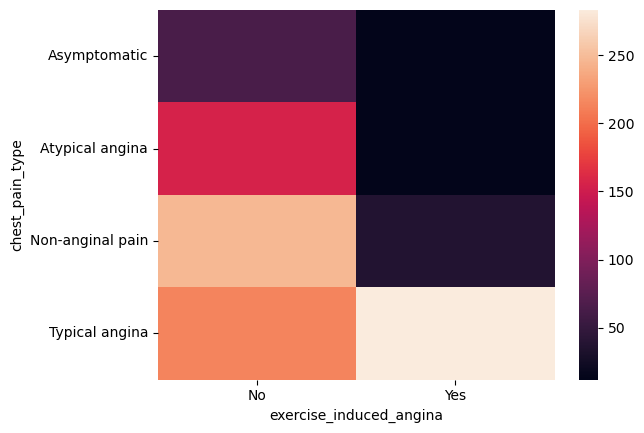

In [24]:
sns.heatmap(pd.crosstab(df['chest_pain_type'],df['exercise_induced_angina']))

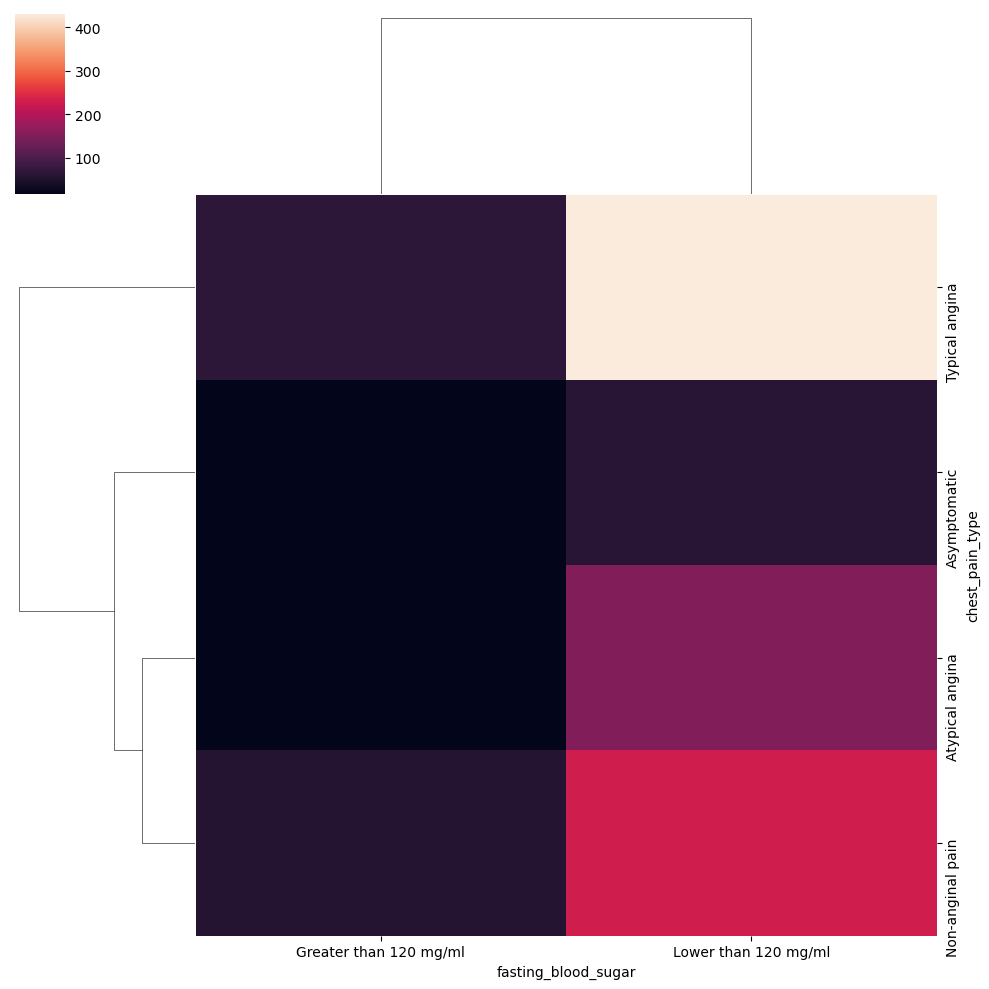

In [25]:
sns.clustermap(pd.crosstab(df['chest_pain_type'],df['fasting_blood_sugar']))

# 🔍 Creating a pairplot to observe trends and relationships between numerical variables

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

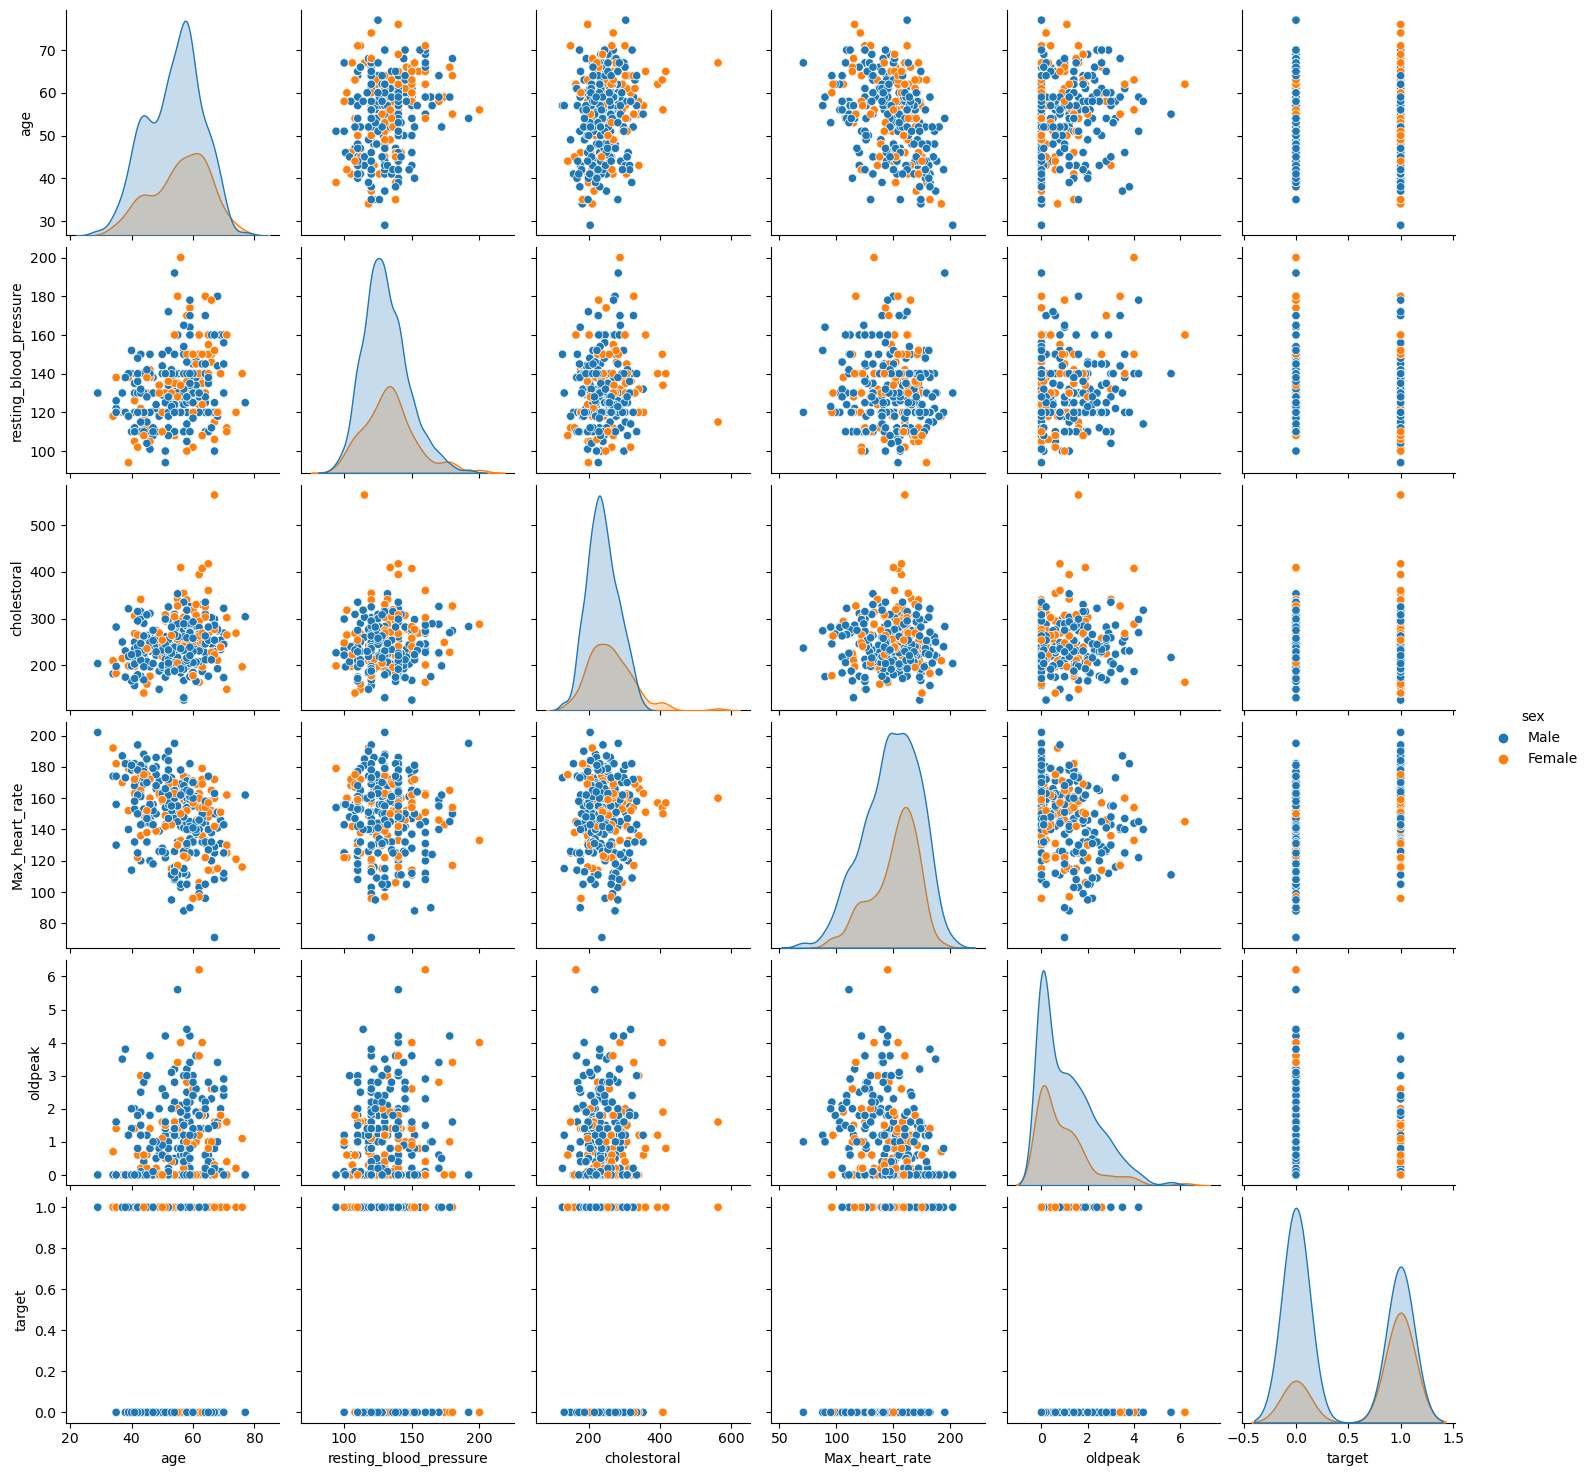

In [26]:
sns.pairplot(df,hue='sex')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


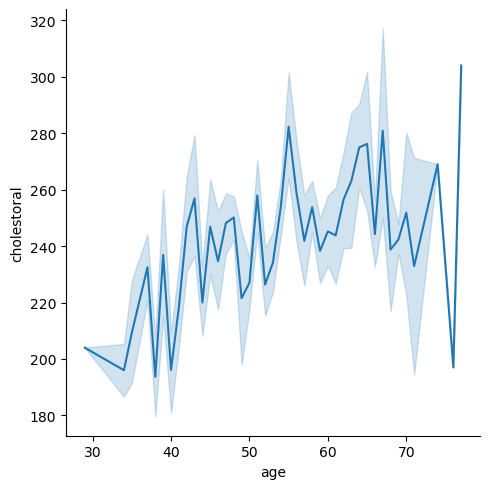

In [27]:
sns.relplot(data=df,x='age',y='cholestoral',kind='line')

In [32]:

# Z-Test for a sample mean
# Example: Checking if the mean age is significantly different from a population mean (assume 50)
pop_mean = 50
sample_mean = df['age'].mean()
sample_std = df['age'].std()
n = len(df['age'])

z_value = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))
p_value = stats.norm.sf(abs(z_value)) * 2  # Two-tailed test

print(f"Z-value: {z_value}, P-value: {p_value}")


Z-value: 15.6478624368234, P-value: 3.43566966888833e-55


In [33]:

# T-Test for a sample mean
# Example: Checking if the mean cholesterol level is significantly different from a given value (assume 200)
t_stat, p_val = stats.ttest_1samp(df['cholesterol'].dropna(), 200)

print(f"T-value: {t_stat}, P-value: {p_val}")


KeyError: 'cholesterol'

In [ ]:

# Chi-Square Test for Independence
# Example: Checking if gender and target disease outcome are independent
contingency_table = pd.crosstab(df['sex'], df['target'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Value: {chi2}, P-value: {p}, Degrees of Freedom: {dof}")
